In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import random

# Creating data

In [2]:
def create_dataset(points, variance, step=2, correlation=True):
    val = 1
    y_train = []
    for i in range(points):
        y = val + random.randrange(-variance, variance)
        y_train.append(y)
        if correlation:
            val += step
        elif not correlation:
            val -= step
    X_train = [i for i in range(len(y_train))]
    return np.array(X_train), np.array(y_train)
    
X_train, y_train = create_dataset(50, 20, 2)

# Implement fitting of linear regression and squared error

In [3]:
def fit_linear_regression(X_train, y_train):
    m = (mean(X_train * mean(y_train)) - mean(X_train * y_train)) / (mean(X_train)**2 - mean(X_train**2))
    b = mean(y_train) - m * mean(X_train)
    return m, b

def squared_error(y, y_line):
    return sum((y - y_line)**2)

def coefficient_of_determination(y, y_line):
    y_mean_line = [mean(y) for _ in y]
    squared_error_regression_line = squared_error(y, y_line)
    squared_errory_mean = squared_error(y, y_mean_line)
    return 1 - (squared_error_regression_line / squared_errory_mean)

# Fit linear regression

In [4]:
m, b = fit_linear_regression(X_train, y_train)
print(m, b)

1.7241379310344827 5.620689655172413


# Regression line

In [5]:
regression_line = [m * x + b for x in X_train]

# Evaluate squared error

In [6]:
r_squared = coefficient_of_determination(y_train, regression_line)
print(r_squared)

0.841587674718734


# Predicting

In [7]:
X_pred = 4
y_pred = m * X_pred + b
print(y_pred)

12.517241379310343


# Charts

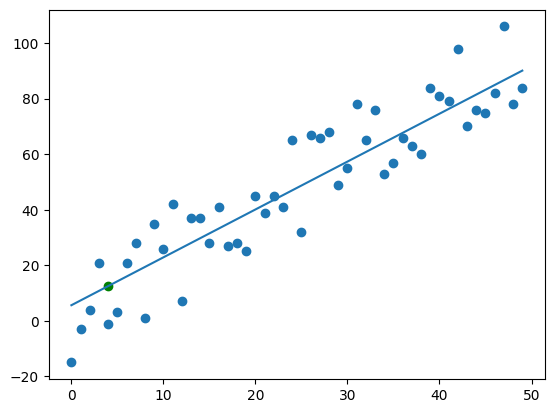

In [8]:
plt.scatter(X_train, y_train)
plt.scatter(X_pred, y_pred, color='g')
plt.plot(X_train, regression_line)
plt.show()